## Студент Волокитина Анастасия
## Часть 1: парсер

Они находятся в этом каталоге: https://www.litres.ru/genre/programmirovanie-5272/

Вам нужно собрать датасет о книгах с первых 40-ти страниц каталога (около 960 книг.) Подсказка. Можете начать с исследования html кода этой страницы.

Вам необходимо собрать датасет, содержащий следующие данные:

- name: название книги
- author: автор
- link: ссылка на книгу
- rating: рейтинг по 5-балльной шкале
- rating_count: количество оценок
- review_count: количество отзывов
- pages_count: объем (число страниц)
- price: цена
- text_reviews: тексты отзывов: список строк
- age: возрастное ограничение
- year: год написания

In [4]:
#pip install beautifulsoup4
#pip install requests

In [5]:
#импортируем необходимые библиотеки
import requests
from bs4 import BeautifulSoup

In [7]:
#выполним GEt запрос
url = 'https://www.litres.ru/genre/programmirovanie-5272/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [187]:
#print(soup)

In [ ]:
#не стала делать парсер

## Часть 2: EDA


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Смотрим на датасет (5 строк)

In [52]:
data = pd.read_csv('/Users/anastasiavolokitina/Downloads/litres_programming_data.csv')
data.drop(data.columns [0], axis= 1 , inplace= True ) #уберем первую колонку с индексом
data.head()

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12+,2023
1,Python 3 и PyQt 6. Разработка приложений,Николай Прохоренок,https://www.litres.ru/book/vladimir-dronov/pyt...,4.7,3,1,549.0,831 стр.,831,"['Большая книга, посвященная реализации графич...",0+,2023
2,Система взаимодействия. Коммуникации в бизнес-...,Е. Ю. Хрусталева,https://www.litres.ru/book/e-u-hrustaleva/sist...,4.3,10,3,250.0,130 стр.,130,['Полезная книга. Есть примеры оповещения поль...,12+,2019
3,Постановка задачи обеспечения автоматизации по...,О. В. Тиханычев,https://www.litres.ru/book/o-v-tihanychev/post...,0.0,0,0,168.0,10 стр.,10,[],0+,2021
4,Разработка и реализация портальных решений. Пр...,С. В. Маркова,https://www.litres.ru/book/pavel-lukyanov/razr...,0.0,0,0,350.0,166 стр.,166,[],0+,2020


**В датасете 12 колонок и 965 строк.
А так же нет пропусков ни в одной колонке ( Non-Null Count = количеству строк)**

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    object 
 11  year             965 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.6+ KB


Если считать это пропусками, то в колонке text_of_reviews есть кейсы с '[]' в случаях, когда отзывов нет

Все колонки, которые должны быть с числовыми тами данных, уже с типами int64 или float64. Однако также переведу в числовой тип данных колонку age, которая показывает возрастное ограничение

In [54]:
data['age'] = data.age.str.extract('(^\d*)') #берем только цифры(это иключит + в конце)
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             965 non-null    object 
 1   author           965 non-null    object 
 2   link             965 non-null    object 
 3   rating           965 non-null    float64
 4   rating_count     965 non-null    int64  
 5   review_count     965 non-null    int64  
 6   price            965 non-null    float64
 7   pages            965 non-null    object 
 8   pages_count      965 non-null    int64  
 9   text_of_reviews  965 non-null    object 
 10  age              965 non-null    int64  
 11  year             965 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.6+ KB


#### 4. Посмотрим все базовые статистики

In [55]:
data.describe()

,rating,rating_count,review_count,price,pages_count,age,year
count,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,2.543420,10.338860,1.603109,348.744021,222.014508,4.800000,2016.327461
std,2.193727,36.058249,3.134103,279.907683,236.922129,6.650617,5.646624
min,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,1985.000000
25%,0.000000,0.000000,0.000000,129.000000,12.000000,0.000000,2012.000000
50%,3.600000,1.000000,0.000000,200.000000,163.000000,0.000000,2017.000000
75%,4.600000,6.000000,2.000000,549.000000,362.000000,12.000000,2021.000000
max,5.000000,433.000000,37.000000,2200.000000,1223.000000,18.000000,2024.000000


In [56]:
print('Какая медианная цена книги в вашем датасете?')
print(data['price'].median())

print()

print('Какое возрастное ограничение встречается чаще всего?')
mod = data['age'].mode()
print(f'Мода: {mod}')

print()

print('Какое среднее число отзывов в книге?')
print(round(data['review_count'].mean(),1))

print()

print('Сколько книг имеют оценку ниже 4.25?')
print(data[data['rating'] < 4.25]['name'].count())

print()

print('В каком году было написано больше всего книг из датасета?')
mod = data['year'].mode()
print(f'Мода: {mod}')

Какая медианная цена книги в вашем датасете?
200.0

Какое возрастное ограничение встречается чаще всего?
Мода: 0    0
Name: age, dtype: int64

Какое среднее число отзывов в книге?
1.6

Сколько книг имеют оценку ниже 4.25?
619

В каком году было написано больше всего книг из датасета?
Мода: 0    2021
Name: year, dtype: int64


##### 5. Если вы работаете с готовым датасетом, то попробуйте "достать" из столбца pages количество страниц

In [57]:
data['pages']

0       102 стр. 4 иллюстрации
1                    831 стр. 
2                    130 стр. 
3                     10 стр. 
4                    166 стр. 
                ...           
960                  223 стр. 
961    345 стр. 93 иллюстрации
962                   16 стр. 
963                  576 стр. 
964                   10 стр. 
Name: pages, Length: 965, dtype: object

In [63]:
data['pages_myparse'] = data.pages.str.extract('(\d+)(?=\s)') #берем только цифры до первого пробела
data['pages_myparse'] = data['pages_myparse'].astype(int)
#а теперь есть ли кейсы, когда не мэтчится с pages_count, чтобы проверить правильность 
data[data['pages_myparse'] != data['pages_count']]

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_myparse


Не сходящихся кейсов нет, значит количество страниц достала правильно

#### 6. Создайте новое поле is_popular. Значение равно 1, если рейтинг книги не менее 4.6 и при этом у нее не менее 5 отзывов, и 0 в остальных случаях

In [67]:
data['is_popular'] = np.where((data['rating'] >= 4.6) & (data['review_count'] >= 5), 1, 0)
data.head(1)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_myparse,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,102,1


#### 7. Как отличается среднее число страниц среди популярных и непопулярных книг? 

In [68]:
data.groupby(['is_popular'], as_index = False).aggregate({'pages_count': 'mean'})

,is_popular,pages_count
0,0,216.564845
1,1,380.906250


#### 8. Выведите топ-10 книг по числу отзывов

In [74]:
data.sort_values(by = ['review_count'], ascending = False).head(10)

,name,author,link,rating,rating_count,review_count,price,pages,pages_count,text_of_reviews,age,year,pages_myparse,is_popular
0,Нейросети начало,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,4.9,433,37,690.0,102 стр. 4 иллюстрации,102,['Книга отличная. Давно хотела понять как все ...,12,2023,102,1
775,Теоретический минимум по Computer Science. Все...,Владстон Феррейра Фило,https://www.litres.ru/book/vladston-ferreyra-f...,3.9,94,28,599.0,224 стр.,224,['Прекрасная книга. Рекомендовал и старшим шко...,16,2017,224,0
98,#Сам себе программист. Как научиться программи...,Кори Альтхофф,https://www.litres.ru/book/kori-althoff/sam-se...,4.2,128,25,299.0,210 стр.,210,"['Отличная книга чтобы начать программировать,...",12,2017,210,0
692,Нейросети. Обработка естественного языка,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/neyro...,5.0,377,19,690.0,231 стр. 20 иллюстраций,231,['Отличная серия! Обложки просто кайф. Много п...,12,2023,231,1
494,"Изучаем Python: программирование игр, визуализ...",Эрик Мэтиз,https://www.litres.ru/book/erik-metiz/izuchaem...,4.3,74,18,699.0,512 стр.,512,"['Осторожно, под видом второго издания продает...",16,2021,512,0
528,"Swift. Основы разработки приложений под iOS, i...",Василий Усов,https://www.litres.ru/book/vasiliy-usov/swift-...,3.1,64,17,499.0,545 стр.,545,['Книга хорошая. Все подробно описано. Единств...,16,2021,545,0
89,Облачные технологии. Практическое руководство ...,Джейд Картер,https://www.litres.ru/book/dzheyd-karter/oblac...,5.0,268,17,690.0,212 стр. 5 иллюстраций,212,['Автор не перестает радовать годными книгами....,12,2024,212,1
458,Путь лидера,Джейд Картер,https://www.litres.ru/book/anna-kozlovceva/put...,5.0,173,17,199.0,215 стр. 10 иллюстраций,215,['Отличное руководство. Расписан каждый шаг. Д...,12,2023,215,1
481,Программирование на C++ в примерах и задачах,Алексей Васильев,https://www.litres.ru/book/aleksey-nikolaevich...,4.0,78,16,419.0,369 стр.,369,"['Я купил эту книгу в бумажном виде, прочитав ...",12,2017,369,0
947,1С:Программирование для начинающих. Детям и ро...,м. г. радченко,https://www.litres.ru/book/m-g-radchenko/1s-pr...,4.0,64,15,550.0,781 стр.,781,['Эту книгу я бы рекомендовала самой первой к ...,12,2022,781,0


#### 9. Найдите среднюю длину отзыва (в символах)

In [181]:
import regex as re
out = ' '.join(data['text_of_reviews'])
out = out.replace('[','').replace(']','').replace("\'",'|')
out = out.split("|")
result_list = [element for element in out if any(char.isalpha() for char in element)] #оставляем только с буквами
result_list = [i.replace("'",' ') for i in result_list]
#пример отзыва
result_list[1]

'Если вы хотите начать изучать нейросети, то это то, что вам нужно. Автор очень хорошо объясняет, что такое нейросеть и как она работает. Книга содержит примеры и задания, которые помогут вам углубить свои знания в этой области. Я думаю, что эта книга подойдет для всех, кто интересуется нейросетями, независимо от уровня подготовки.'

In [186]:
lens = [] # список с длинами отзывов
for r in result_list:
    lens.append(len(r))
print(f'Среднее количество символов в отзыве: {round(sum(lens) / len(lens))}')

Среднее количество символов в отзыве: 216


#### 10. Постройте таблицу корреляций числовых переменных. (1) Прокомментируйте результаты. (1)

In [77]:
# колонку year включать нет смылса хоть это и числовая переменная
correlation_matrix = data[['rating', 'rating_count', 'review_count', 'price', 'pages_count', 'age']].corr()
print(correlation_matrix)

                rating  rating_count  review_count     price  pages_count  \
rating        1.000000      0.257016      0.402186  0.410324     0.509376   
rating_count  0.257016      1.000000      0.683794  0.208341     0.135824   
review_count  0.402186      0.683794      1.000000  0.309463     0.348800   
price         0.410324      0.208341      0.309463  1.000000     0.639805   
pages_count   0.509376      0.135824      0.348800  0.639805     1.000000   
age           0.433156      0.221253      0.352973  0.484190     0.424448   

                   age  
rating        0.433156  
rating_count  0.221253  
review_count  0.352973  
price         0.484190  
pages_count   0.424448  
age           1.000000  


Визуализируем:

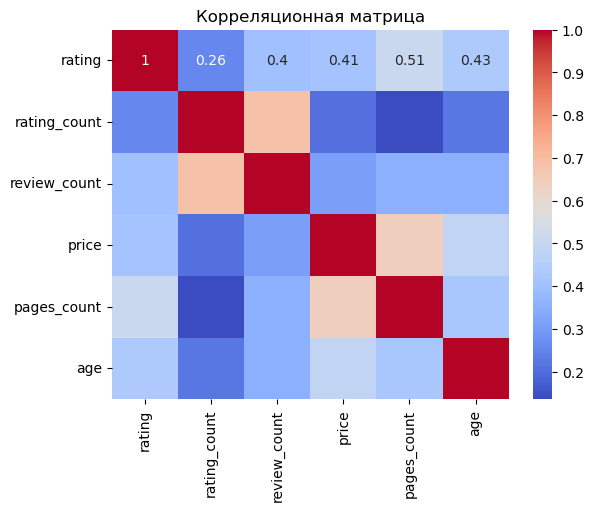

In [79]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Выводы:
- наиболее выраженная коррекляция наблюдается между параметрами review_count и rating_count (0.68 - средняя связь). Это логично, так как когда ты оставляешь отзыв на книгу, то ты либо просто ставишь оценку, либо оценку+ отзыв. Письменный отзыв пишут меньше людей, но без проставления оценки ты не можешь написать отзыв
- также корреляция есть между показателями price и pages_count. В целом здесь есть доля правды, количество страниц увеличивает стоимость книги, но это не всегда работает. Бывает, что очень популярные книги даже с небольшим количеством страниц стоят больше чем менее популярные с большим количеством страниц

#### 11. Постройте диаграмму рассеяния (scatterplot) количества страниц и количества отзывов. Не забудьте подписать график и оси. (1) Прокомментируйте полученные результаты. (1)

Text(0, 0.5, 'Количество отзывов')

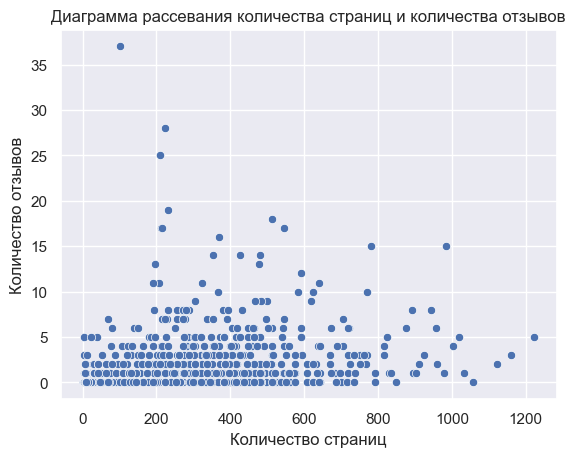

In [105]:
sns.scatterplot(x = data["pages_count"], y = data["review_count"])
plt.title('Диаграмма рассевания количества страниц и количества отзывов')
plt.xlabel('Количество страниц')
plt.ylabel('Количество отзывов')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


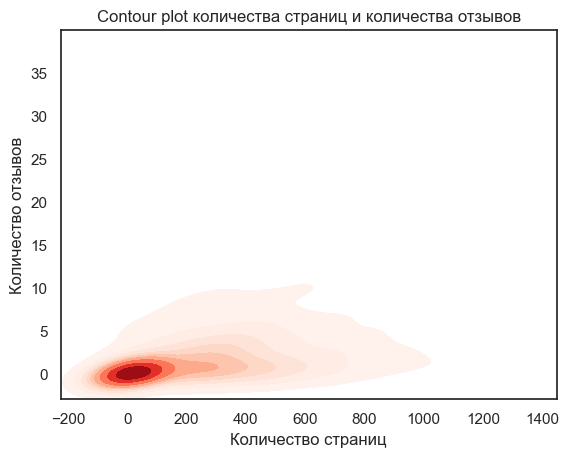

In [106]:
sns.set_style("white")
sns.kdeplot(x = data["pages_count"], y =  data["review_count"], cmap="Reds", fill=True)
plt.title('Contour plot количества страниц и количества отзывов')
plt.xlabel('Количество страниц')
plt.ylabel('Количество отзывов')
plt.show()

Если посмотреть на график, а также учесть корреляцию этих параметров (около 0,34- связь отсутствует), невозможно сделать отдозначных выводов по поводу взаимосвязи данных параметров. В целом книги большого обьема читают меньше людей(соответственно, меньше наблюдений. Но если например взлянуть на точки в районе 750-1000 страниц, то можно увидеть, что есть книги, которые получили доволньо много отзывов (чуть меньше 15)  (при условии, что среднее число отзывов 1.7)

#### 12. Постройте линейный график: по оси Х год, по оси Y количество книг. (1) Прокомментируйте. (1)

In [91]:
# агрегируем количество книг по году
linechart = data.groupby(['year'], as_index = False).aggregate({'link': 'count'})
linechart

,year,link
0,1985,2
1,1995,2
2,2000,2
3,2002,1
4,2003,3
5,2004,4
6,2005,5
7,2006,28
8,2007,14
9,2008,23


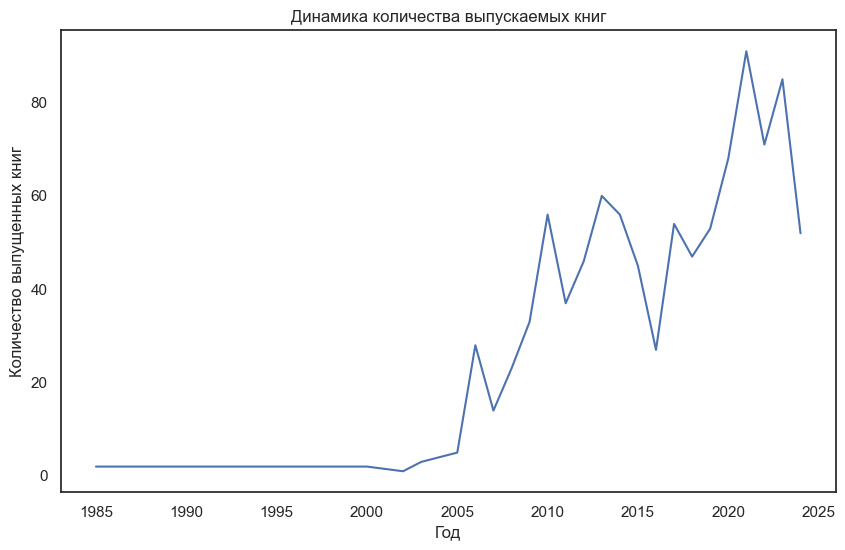

In [107]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(linechart['year'], linechart['link']);
plt.title('Динамика количества выпускаемых книг')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных книг')
plt.show()

Выпускаемое количество книг по сфере IT после 2005 года стремительно растет. Есть значительный провал в 2016 году!
В самом конце (2024 год) график уходи вниз, так как год еще не завершен, следовательно, количество книг априори будет меньше

#### 13. Постройте еще любые два графика по вашему усмотрению. (2) Прокомментируйте полученные результаты. (1.5)

In [ ]:
Построим скрипичный график зависимости цены (price) от флага is_popular

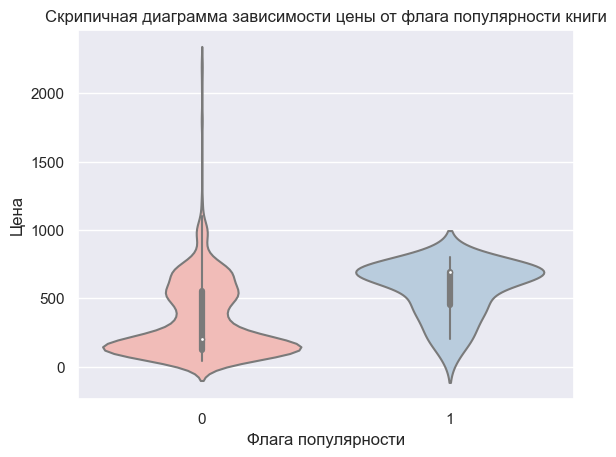

In [109]:
  
sns.set_theme(style="darkgrid")
 
# Grouped violinplot
sns.violinplot(y = data["price"], x = data["is_popular"], palette="Pastel1")
plt.title('Скрипичная диаграмма зависимости цены от флага популярности книги')
plt.xlabel('Флага популярности')
plt.ylabel('Цена')
plt.show()

По графику видно, что в более популярных книга средняя цена выше. Это график подтверждает расчеты в пункте номер 7. Однако на графике непопулярных книг видно, что у скрипки большой верхний хвост, то есть в непопулярных книгах цена может быть сильно высокой. Возможно, это какие-то очень большие тома теории, у которых высокая стоимость, но мало покупок и отзывов. 

Построим гистограмму для параметра review count (количество отзывов)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


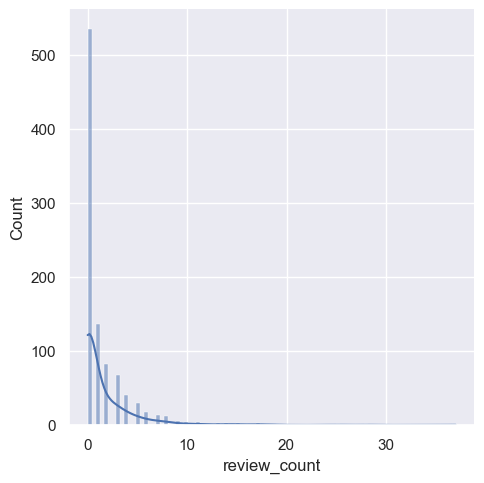

In [129]:
sns.displot( data = data["review_count"], kde=True )

Пролагоривмируем наш показатель

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


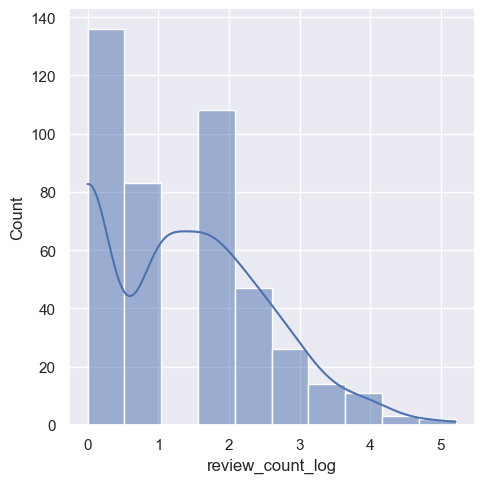

In [132]:
data['review_count_log'] = np.log2(data['review_count'])
sns.displot(data = data['review_count_log'], kde = True )

Распределение количества отзывов далеко от нормального

**Обогатим линейный график под пунктом 12.**
**Сделаем пузырьковую диаграмму динамики количества книг со средней ценой за книгу этого года в качестве размера пузыря

In [140]:
linechart = data.groupby(['year'], as_index = False).aggregate({'link': 'count', 'price': 'mean'})
linechart.head()

,year,link,price
0,1985,2,266.000000
1,1995,2,599.000000
2,2000,2,64.000000
3,2002,1,199.000000
4,2003,3,679.333333


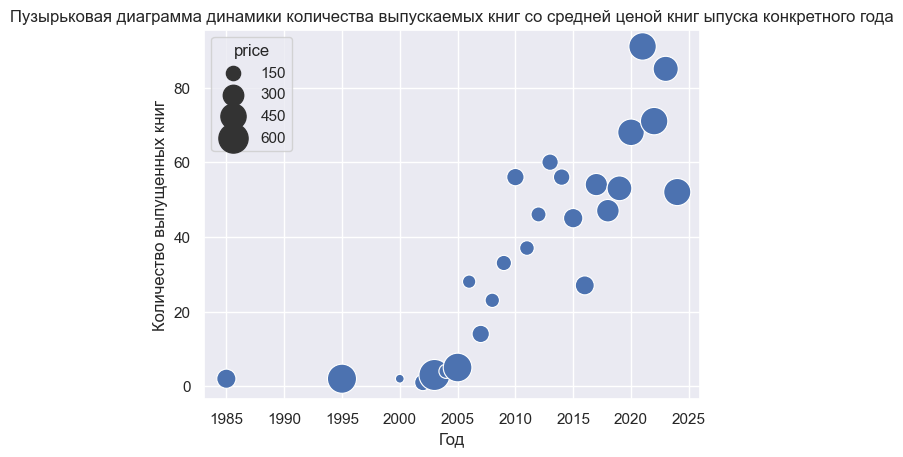

In [141]:
sns.scatterplot(data = linechart, x="year", y="link", size = "price", legend = True, sizes=(40, 500))
plt.title('Пузырьковая диаграмма динамики количества выпускаемых книг со средней ценой книг ыпуска конкретного года')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных книг')
plt.show()

В целом видно, что с ростом количества выпускаемых книг растет и их цена. Есть старые книги с большой ценой, но у нас малое количество наблюдений старых книг

#### 14.Постройте таблицу с авторами книг с именем автора, количество книг в датасете, средней оценкой книг, средним количеством отзывов. (2).

In [145]:
data.groupby(['author'], as_index = False).aggregate({'name':'count', 
                                                      'rating': 'mean', 
                                  'review_count': 'mean'}).sort_values(by = ['name'], ascending = False)

,author,name,rating,review_count
16,А. А. Емельянов,14,0.714286,0.071429
274,Джейд Картер,14,4.992857,12.428571
670,Тимур Машнин,13,4.692308,0.769231
345,Е. Ю. Хрусталева,13,3.507692,3.769231
208,Владимир Дронов,10,4.160000,2.500000
...,...,...,...,...
272,Джей Венгроу,1,5.000000,0.000000
273,Джей Джей Гивакс,1,3.800000,4.000000
275,Джейк Вандер Плас,1,4.100000,6.000000
276,Джейми Чан,1,4.500000,3.000000


Я просортировала авторов по количеству выпущенных книг и, на удивление, человек с большим количеством выпущенных книг(14) - Емельянов имеет очень низкий средний рейтинг - 0.7, и очень низкое среднее количество отзывов.
Для обьективности необходимо убрать из расчета книги без отзывов и какого-либо рейтинга(0)

In [152]:
#заменим нулевое значение на пропуск, чтобы нули не учитывались в расчете
#так как они оченьсильно смещают оценку. По факту рейтинг не 0 а отсутствует
data['rating'] = data['rating'].replace({0.0 :np.nan})
data['review_count'] = data['review_count'].replace({0.0 :np.nan})

In [153]:
data.groupby(['author'], as_index = False).aggregate({'name':'count', 
                                                      'rating': 'mean', 
                                  'review_count': 'mean'}).sort_values(by = ['name'], ascending = False)

,author,name,rating,review_count
16,А. А. Емельянов,14,3.333333,1.000000
274,Джейд Картер,14,4.992857,12.428571
670,Тимур Машнин,13,4.692308,1.666667
345,Е. Ю. Хрусталева,13,4.560000,4.454545
208,Владимир Дронов,10,4.160000,3.125000
...,...,...,...,...
272,Джей Венгроу,1,5.000000,NaN
273,Джей Джей Гивакс,1,3.800000,4.000000
275,Джейк Вандер Плас,1,4.100000,6.000000
276,Джейми Чан,1,4.500000,3.000000


Оценка стала более справедливой